In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm

from scipy.integrate import quad, trapz
import scipy.stats as stats

In [2]:
# Definición de variables eV

k = 1.380649e-23    # J / K
h = 6.62607015e-34  # J*s
h_bar = h/(2*np.pi) # J*s
m = 0.5*9.1e-31     # kg
q = 1.602176e-19    # C

Ec = -4.7 * q       # J
Ef = -5.0 * q       # J

L = 40e-9           # m
W = 3*L             # m

alfa = L*W*m/(np.pi*h_bar*h_bar)

C_g = 0.1e-15       # F 
C_q = q*q*m*W*L/(2*np.pi*h_bar*h_bar)   # F

C_es = C_g + C_q

eta_0 = 1.0
eta = C_g/C_es

V_t = (Ec-Ef)/(q)

# Parte I

In [49]:
# Funciones de integrales
def g(E, Ec): # g(E)dE eq 2.47 pag 70
    return alfa * (E > Ec)


def fermi_dirac(E, T):
    return np.piecewise(E, [E<0, E>=0], [lambda x: 1/(1 + np.exp(x/(k*T))), lambda x: np.exp(-x/(k*T))/(1 + np.exp(-x/(k*T)))] )



def N(E, U, T, Vds):
    y = g(E-U, Ec) * (fermi_dirac(E-Ef, T) + fermi_dirac(E-(Ef-Vds*q), T))
    return 0.5 * np.trapz(y, E)


def U(N, N_0, V_gs): # eq 5.33
    return q*q/C_es*(N-N_0)-V_gs*q

# Funciones de cálculo



# Loop de autoconsistencia
def solve_I(Vds, T, Vgs, U_ = -0.8*q, tol = 1e-5, lr = 1e-3):
    
    E = np.linspace(Ec, 0, 100000)

    N_0 = N(E = E, U = 0, T = T, Vds = 0)
    print(f"N_0 = {N_0}")
    
    U_array = []
    error = []

    for _ in tqdm(range(int(200)), disable=False):
        N_ = N(E, U_, T, Vds)
        # print(f"N = {N_}")
        U_computed = U(N_, N_0, Vgs)

        U_array.append(U_computed)

        # print(U_)

        if abs(U_computed - U_) < tol:
            print('Converged')
            break
        else:
            U_ = U_ + lr*(U_computed - U_)
            # print(f"lr*error = {lr*(U_computed - U_)}")


        error.append(abs(U_computed - U_))
    
    plt.plot(np.array(U_array)/q)
    # plt.plot(np.array(error)/q)
    # plt.yscale('log')
    # plt.xscale('log')

    # I = get_I(U,T,Vds)
    return U_array


In [40]:
x = np.linspace(-5*q,1*q, 1000)

N(E=x, U=-0.3*q, T=100, Vds=0.25)

30.349395523158936

N_0 = 0.0021689546208196295


  0%|          | 0/200 [00:00<?, ?it/s]

100%|██████████| 200/200 [00:02<00:00, 75.67it/s]


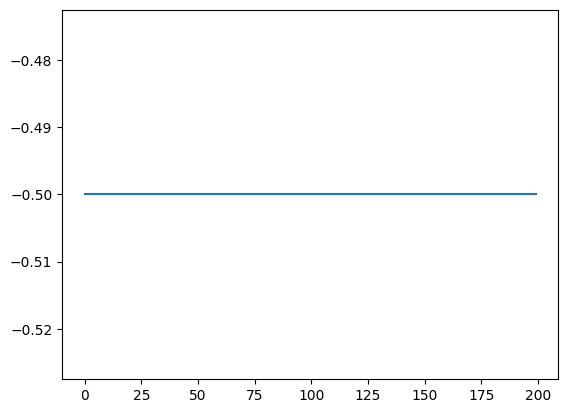

In [48]:
a = solve_I(Vds = 0.25, 
        T = 298, 
        Vgs = 0.5, 
        lr = 0.005,
        tol = 1e-2*q)
# print(U,I*1e6)

# N_0 = get_N(-0.5*eta*q, 298, 0)
# print(N_0)
    # print(f"N_0 = {N_0}")

In [39]:
def plot_IVds(T,Vgs, tol = 1e-25,lr = 1e-2):
    Vds_array = np.arange(0, 0.5, 0.01)

    Ids_array = []

    U = -1*q

    for i, Vds in enumerate(Vds_array):
        U, I = solve_I(
            Vds = Vds,
            T = T,
            Vgs = Vgs,
            U_ = U,
            lr = lr,
            tol = tol
        )
        Ids_array.append(I)

        if i % 10 == 0:
            print(i)

    plt.plot(Vds_array, np.array(Ids_array)*1e6)
    plt.ylabel(r"$I_{ds}$ [uA]")
    plt.xlabel(r"$V_{ds}$ [V]")
    plt.title(f"T = {T} [K] and {r'$V_{gs}$'} = {Vgs} [V]")
    plt.grid()

    return Vds_array, Ids_array

 14%|█▍        | 1414/10000 [00:01<00:07, 1089.74it/s]


0


  0%|          | 0/10000 [00:00<?, ?it/s]


10


  0%|          | 0/10000 [00:00<?, ?it/s]


20


  0%|          | 0/10000 [00:00<?, ?it/s]


30


  0%|          | 0/10000 [00:00<?, ?it/s]


40


  0%|          | 0/10000 [00:00<?, ?it/s]


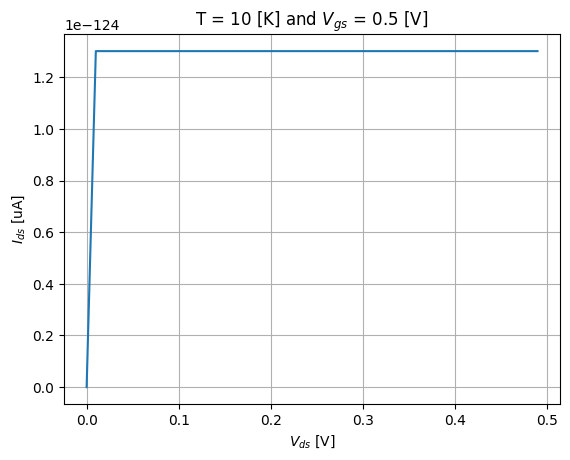

In [63]:
Vds_array, Ids_array = plot_IVds(
    T = 10,
    Vgs = 0.5,
    tol = 1e-25
)

# Parte II

In [41]:
def I_lineal(Vds, V_gs): # eq 5.60
    cnt = q*W/(h_bar*h_bar*np.pi*np.pi)*np.sqrt(8*m/9)*np.sqrt(q*eta)**3
    # print(np.sqrt(V_gs-V_t-Vds/eta)**3, np.sqrt(V_gs-V_t)**3, cnt, cnt*(np.sqrt(V_gs-V_t)**3-np.sqrt(V_gs-V_t-Vds/eta)**3))
    return cnt*(np.sqrt(V_gs-V_t)**3-np.sqrt(V_gs-V_t-Vds/eta)**3)


def I_saturado(V_gs): # eq 5.61
    cnt =  q*W/(h_bar*h_bar*np.pi*np.pi)*np.sqrt(8*m/9)*np.sqrt(q*eta)**3
    return cnt*np.sqrt(V_gs-V_t)**3


# I_lineal = np.vectorize(I_lineal)
# I_saturado = np.vectorize(I_saturado)


In [42]:
eta*(0.5-V_t*q)

0.0554134775452663

In [45]:
def plot_IVds_T0(Vgs, ax):
    Vds_array = np.linspace(0, 0.5, 1000)

    Ids_array = []

    for i, Vds in enumerate(Vds_array):
        if Vds < eta*(Vgs-V_t):
            I = I_lineal(Vds, Vgs)
        else:
            I = I_saturado(Vgs)
        Ids_array.append(I)
        

    plt.plot(Vds_array, np.array(Ids_array)*1e6)
    plt.ylabel("Ids [uA]")
    plt.xlabel("Vds [V]")
    plt.title(f"T = 0 [K] and Vgs = {Vgs} [V]")
    plt.grid()

    return Vds_array, Ids_array

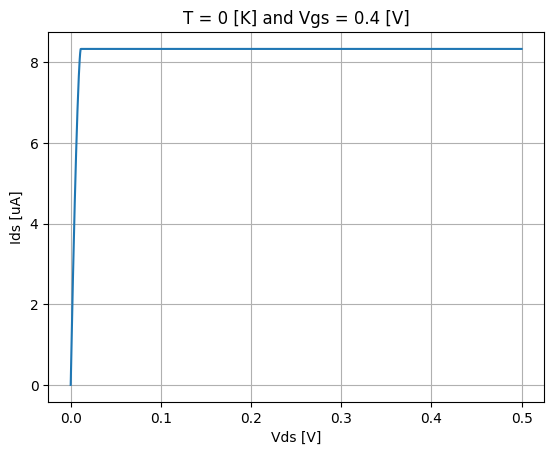

In [58]:
a = plot_IVds_T0(0.4)

In [266]:
np.sqrt(0.5-V_t)**3-np.sqrt(0.5-V_t-0.05/eta)**3

C:\Users\diego\AppData\Local\Temp\ipykernel_22168\1432670519.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(0.5-V_t)**3-np.sqrt(0.5-V_t-0.05/eta)**3


nan

In [267]:
q*W/(h_bar*h_bar*np.pi*np.pi)*np.sqrt(8*m/9)*np.sqrt(q*eta)**3

1.8338132407389643e-40

C:\Users\diego\AppData\Local\Temp\ipykernel_22168\2360004553.py:4: RuntimeWarning: invalid value encountered in sqrt
  return cnt*(np.sqrt(V_gs-V_t)**3-np.sqrt(V_gs-V_t-Vds/eta)**3)


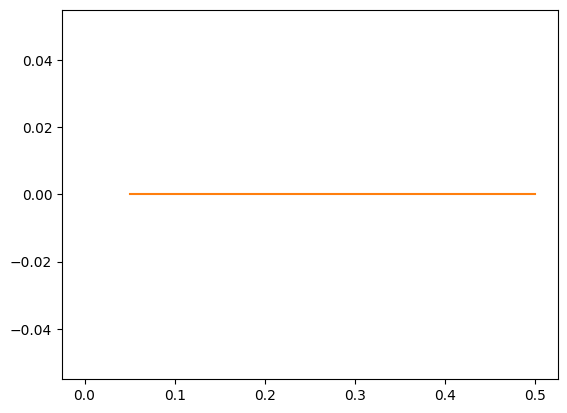

In [265]:
x = np.linspace(0,0.05, 10)
x_ = np.linspace(0.05,0.5,10)

V_gs = 0.5
V_gs_ = np.ones(10)*V_gs

y = I_lineal(x, V_gs)
y_ = I_saturado(V_gs_)

plt.plot(x,y)
plt.plot(x_,y_)

In [28]:
eta

0.8963395609456556